In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
file_path = "cleaned_transactions_data.csv"
df = pd.read_csv(file_path)

In [4]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])

In [5]:
df_monthly_sales = df.groupby(df["Transaction_Date"].dt.to_period("M")).agg({"Total_Cost": "sum"}).reset_index()

In [6]:
df_monthly_sales["Transaction_Date"] = df_monthly_sales["Transaction_Date"].dt.to_timestamp()

In [7]:
df_monthly_sales["Smoothed_Sales"] = df_monthly_sales["Total_Cost"].rolling(window=3, min_periods=1).mean()

In [8]:
arima_model_smooth = SARIMAX(df_monthly_sales["Smoothed_Sales"], 
                             order=(2,1,2),  # Adjusted ARIMA parameters for stability
                             enforce_stationarity=False, 
                             enforce_invertibility=False)

In [9]:
arima_results_smooth = arima_model_smooth.fit()

In [11]:
forecast_steps = 6
forecast_index = pd.date_range(start=df_monthly_sales["Transaction_Date"].iloc[-1], periods=forecast_steps + 1, freq="M")[1:]
forecast_arima_smooth = arima_results_smooth.get_forecast(steps=forecast_steps)

In [12]:
forecast_mean_arima_smooth = forecast_arima_smooth.predicted_mean

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

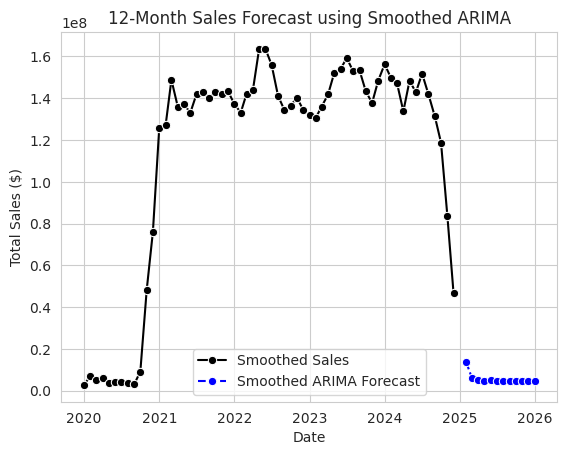

In [14]:
sns.lineplot(x=df_monthly_sales["Transaction_Date"], y=df_monthly_sales["Smoothed_Sales"], marker="o", linestyle="-", color="black", label="Smoothed Sales")
sns.lineplot(x=forecast_index, y=forecast_mean_arima_smooth, marker="o", linestyle="--", color="blue", label="Smoothed ARIMA Forecast")

plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("6-Month Sales Forecast using Smoothed ARIMA")
plt.legend()
plt.show()